In [1]:
from itertools import product
import json
from multiprocessing import Pool

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from nn_influence_group_model import NNInfluenceGroupModel
from utils import calculate_magnetization_n_times

In [2]:
sns.set()

# Generating data and saving

In [3]:
cg_nn_model = NNInfluenceGroupModel(nx.complete_graph(100))

In [4]:
n_runs = 1000
time_steps = 1000
p_vec = np.arange(0, 1.0001, 0.01)
q = 4
f_vec = [0.2, 0.3, 0.4, 0.5]

In [5]:
cg_mean_magnetization_in_time = {f: {} for f in f_vec}

In [6]:
if __name__ == '__main__':
    with Pool() as p:
        results = p.starmap(calculate_magnetization_n_times,
                            product(p_vec, f_vec, [q], [n_runs], [time_steps], [cg_nn_model]))

In [7]:
for p, f, mag in results:
    cg_mean_magnetization_in_time[f][p] = np.mean(mag, axis=0).tolist()[-1]

In [8]:
with open('cg_mean_magnetization_in_time.json', 'w') as f:
    json.dump(cg_mean_magnetization_in_time, f)

In [9]:
with open('cg_mean_magnetization_in_time.json') as f:
    cg_mean_magnetization_in_time = json.load(f)

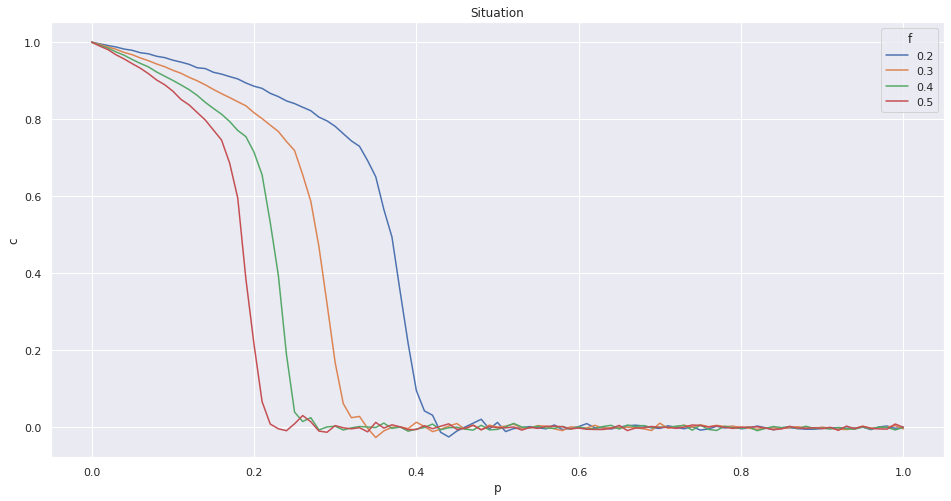

In [10]:
plt.figure(figsize=(16, 8))
pd.DataFrame(cg_mean_magnetization_in_time).plot(ax=plt.gca())
plt.title('Situation')
plt.xlabel('p')
plt.ylabel('c')
plt.legend(title="f");